In [33]:
import pandas as pd
import datetime
!pip install geopandas
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import geopandas as gpd  
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
df = pd.read_csv('datacovid.csv')
ds= pd.read_csv('school.csv')
dfr = pd.read_csv('restrictions.csv')
dfy= pd.read_csv('gdp.csv')
vac=pd.read_csv('datacovid_vaccination.csv')

In [27]:
ds.tail()

,Entity,countryterritoryCode,dateRep,school_closures
32275,Sweden,SWE,27/12/2022,0
32276,Sweden,SWE,28/12/2022,0
32277,Sweden,SWE,29/12/2022,0
32278,Sweden,SWE,30/12/2022,0
32279,Sweden,SWE,31/12/2022,0


In [28]:
num_features = ds.shape[1]
print("Number of features:", num_features)


Number of features: 4


In [29]:
num_values = ds.size
print("Total number of values:", num_values)


Total number of values: 129120


In [60]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,Europe
1,22/10/2022,22,10,2022,5494.0,4.0,Austria,AT,AUT,8901064,Europe
2,21/10/2022,21,10,2022,7776.0,4.0,Austria,AT,AUT,8901064,Europe
3,20/10/2022,20,10,2022,8221.0,6.0,Austria,AT,AUT,8901064,Europe
4,19/10/2022,19,10,2022,10007.0,8.0,Austria,AT,AUT,8901064,Europe


In [30]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2020', 'continentExp'],
      dtype='object')

In [31]:
vac.tail()

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,Region,TargetGroup,Vaccine,Population
659334,2023-W12,SK,2055643.0,0.0,0.0,0,NaN,0,1,0,0,0,SK,Age25_49,JANSS,5434712
659335,2023-W12,SK,2055643.0,0.0,0.0,0,NaN,1,3,3,0,0,SK,Age25_49,COM,5434712
659336,2023-W12,SK,701757.0,0.0,0.0,0,NaN,0,0,2,0,0,SK,Age50_59,COM,5434712
659337,2023-W12,SK,688658.0,0.0,0.0,0,NaN,0,1,2,0,0,SK,Age60_69,COM,5434712
659338,2023-W12,SK,688658.0,0.0,0.0,0,NaN,0,0,2,0,0,SK,Age60_69,UNK,5434712


In [3]:
num_countries = df['countriesAndTerritories'].nunique()
print("Number of distinct countries:", num_countries)


Number of distinct countries: 30


In [33]:
num_features = vac.shape[1]
print("Number of features:", num_features)


Number of features: 16


In [34]:
num_values = vac.size
print("Total number of values:", num_values)


Total number of values: 10549424


In [16]:
vac.columns

Index(['YearWeekISO', 'ReportingCountry', 'Denominator', 'NumberDosesReceived',
       'NumberDosesExported', 'FirstDose', 'FirstDoseRefused', 'SecondDose',
       'DoseAdditional1', 'DoseAdditional2', 'DoseAdditional3', 'UnknownDose',
       'Region', 'TargetGroup', 'Vaccine', 'Population'],
      dtype='object')

In [21]:
dfy.tail()

,Country,dateRep,GDP,countryterritoryCode
82,Spain,2021,30089.517,ESP
83,Spain,2022,29198.086,ESP
84,Sweden,2020,52706.294,SWE
85,Sweden,2021,60815.535,SWE
86,Sweden,2022,56361.425,SWE


In [18]:
num_features = dfy.shape[1]
print("Number of features:", num_features)


Number of features: 4


In [19]:
num_values = dfy.size
print("Total number of values:", num_values)


Total number of values: 348


In [22]:
num_features = dfr.shape[1]
print("Number of features:", num_features)


Number of features: 4


In [23]:
num_values = dfr.size
print("Total number of values:", num_values)

Total number of values: 131520


In [25]:
dfr.head()

,Entity,countryterritoryCode,dateRep,international_travel_controls
0,Austria,AUT,01/01/2020,0
1,Austria,AUT,02/01/2020,0
2,Austria,AUT,03/01/2020,0
3,Austria,AUT,04/01/2020,0
4,Austria,AUT,05/01/2020,0


In [11]:
df.isnull().sum()


dateRep                      0
day                          0
month                        0
year                         0
cases                       93
deaths                     292
countriesAndTerritories      0
geoId                        0
countryterritoryCode         0
popData2020                  0
continentExp                 0
dtype: int64

In [68]:
ds.isnull().sum()


Entity                  0
countryterritoryCode    0
dateRep                 0
school_closures         0
dtype: int64

In [69]:
dfr.isnull().sum()


Entity                           0
countryterritoryCode             0
dateRep                          0
international_travel_controls    0
dtype: int64

In [70]:
dfy.isnull().sum()


Country                 0
dateRep                 0
GDP                     0
countryterritoryCode    0
dtype: int64

In [8]:
vac.isnull().sum()

YearWeekISO         0
ReportingCountry    0
FirstDose           1
SecondDose          1
DoseAdditional1     1
DoseAdditional2     1
DoseAdditional3     1
UnknownDose         0
Region              0
TargetGroup         0
Vaccine             0
Population          0
dtype: int64

In [35]:
cases_median = df["cases"].median()
df["cases"].fillna(cases_median, inplace=True)
deaths_median = df["deaths"].median()
df["deaths"].fillna(deaths_median, inplace=True)


In [36]:
columns_to_drop = ['Denominator', 'NumberDosesReceived', 'NumberDosesExported', 'FirstDoseRefused']
vac = vac.drop(columns_to_drop, axis=1)

In [21]:
vac

,YearWeekISO,ReportingCountry,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,0,0,0,0,0,8.0,AT,ALL,UNK,8901064.0
1,2020-W53,AT,0,0,0,0,0,0.0,AT,ALL,SGSK,8901064.0
2,2020-W53,AT,0,0,0,0,0,0.0,AT,ALL,JANSS,8901064.0
3,2020-W53,AT,0,0,0,0,0,0.0,AT,ALL,COMBA.4-5,8901064.0
4,2020-W53,AT,0,0,0,0,0,0.0,AT,ALL,MODBA.1,8901064.0
...,...,...,...,...,...,...,...,...,...,...,...,...
532857,2021-W29,PL,0,0,0,0,0,0.0,PL41,Age5_9,MOD,37840001.0
532858,2021-W29,PL,0,0,0,0,0,0.0,PL41,Age5_9,JANSS,37840001.0
532859,2021-W29,PL,0,0,0,0,0,0.0,PL84,Age5_9,COM,37840001.0
532860,2021-W29,PL,0,0,0,0,0,0.0,PL22,Age5_9,JANSS,37840001.0


In [37]:
Population_median = vac["Population"].median()
vac["Population"].fillna(Population_median, inplace=True)
UnknownDose_median = vac["UnknownDose"].median()
vac["UnknownDose"].fillna(UnknownDose_median, inplace=True)

In [38]:
firstdose_median = vac["FirstDose"].median()
vac["FirstDose"].fillna(firstdose_median, inplace=True)
seconddose_median = vac["SecondDose"].median()
vac["SecondDose"].fillna(seconddose_median, inplace=True)
Doseadditional_median = vac["DoseAdditional1"].median()
vac["DoseAdditional1"].fillna(Doseadditional_median, inplace=True)
Doseadditional2_median = vac["DoseAdditional2"].median()
vac["DoseAdditional3"].fillna(Doseadditional2_median, inplace=True)
Doseadditional3_median = vac["DoseAdditional3"].median()
vac["DoseAdditional3"].fillna(Doseadditional3_median, inplace=True)

In [39]:
import pandas as pd

# Assuming you have a pandas DataFrame named "df" containing the vaccination dataset

# Impute Region column with mode
region_mode = vac['Region'].mode().iloc[0]
vac['Region'].fillna(region_mode, inplace=True)

# Impute Vaccine column with mode
vaccine_mode = vac['Vaccine'].mode().iloc[0]
vac['Vaccine'].fillna(vaccine_mode, inplace=True)

# Impute TargetGroup column with mode
target_group_mode = vac['TargetGroup'].mode().iloc[0]
vac['TargetGroup'].fillna(target_group_mode, inplace=True)


In [40]:
vac.isnull().sum()

YearWeekISO         0
ReportingCountry    0
FirstDose           0
SecondDose          0
DoseAdditional1     0
DoseAdditional2     0
DoseAdditional3     0
UnknownDose         0
Region              0
TargetGroup         0
Vaccine             0
Population          0
dtype: int64

In [45]:
vac.head()

,YearWeekISO,ReportingCountry,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,0,0,0,0,0,8,AT,ALL,UNK,8901064
1,2020-W53,AT,0,0,0,0,0,0,AT,ALL,SGSK,8901064
2,2020-W53,AT,0,0,0,0,0,0,AT,ALL,JANSS,8901064
3,2020-W53,AT,0,0,0,0,0,0,AT,ALL,COMBA.4-5,8901064
4,2020-W53,AT,0,0,0,0,0,0,AT,ALL,MODBA.1,8901064


In [41]:
def iso_to_normal(iso_date):
    # Split the year and week number
    year, week_num = iso_date.split("-W")
    # Define the date of the first day of the week
    first_day = datetime.datetime.strptime(f'{year}-W{int(week_num)-1}-1', "%Y-W%W-%w")
    # Calculate the date of the last day of the week
    last_day = first_day + datetime.timedelta(days=6)
    # Convert the last day to a string in the format "DD/MM/YYYY"
    normal_date = last_day.strftime("%d/%m/%Y")
    return normal_date


# Apply the function to the column containing the ISO week dates
vac['dateRep'] = vac['YearWeekISO'].apply(iso_to_normal)
vac=vac.drop("YearWeekISO", axis=1)
# Print the updated DataFrame
print(vac.head())

  ReportingCountry  FirstDose  SecondDose  DoseAdditional1  DoseAdditional2  \
0               AT          0           0                0                0   
1               AT          0           0                0                0   
2               AT          0           0                0                0   
3               AT          0           0                0                0   
4               AT          0           0                0                0   

   DoseAdditional3  UnknownDose Region TargetGroup    Vaccine  Population  \
0                0            8     AT         ALL        UNK     8901064   
1                0            0     AT         ALL       SGSK     8901064   
2                0            0     AT         ALL      JANSS     8901064   
3                0            0     AT         ALL  COMBA.4-5     8901064   
4                0            0     AT         ALL    MODBA.1     8901064   

      dateRep  
0  03/01/2021  
1  03/01/2021  
2  03/01/2021 

In [54]:
vac.head()

,ReportingCountry,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,Region,TargetGroup,Vaccine,Population,dateRep
0,AT,0,0,0,0,0,8,AT,ALL,UNK,8901064,03/01/2021
1,AT,0,0,0,0,0,0,AT,ALL,SGSK,8901064,03/01/2021
2,AT,0,0,0,0,0,0,AT,ALL,JANSS,8901064,03/01/2021
3,AT,0,0,0,0,0,0,AT,ALL,COMBA.4-5,8901064,03/01/2021
4,AT,0,0,0,0,0,0,AT,ALL,MODBA.1,8901064,03/01/2021


In [42]:
merged_dataset = pd.merge(df, dfr, on=['dateRep', 'countryterritoryCode'])
dfy['dateRep'] = dfy['dateRep'].astype(str)
merged_dataset['dateRep2'] = pd.to_datetime(merged_dataset['dateRep']).dt.year
dfy = dfy.rename(columns={'dateRep': 'dateRep2'})
merged_dataset['dateRep2'] = merged_dataset['dateRep2'].astype(str)
merged_datasetf = pd.merge(merged_dataset, dfy, on=[ 'dateRep2','countryterritoryCode'])
merged_datasetfb = pd.merge(merged_datasetf, ds, on=[ 'dateRep','countryterritoryCode'])

<ipython-input-42-3b8184e75386>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_dataset['dateRep2'] = pd.to_datetime(merged_dataset['dateRep']).dt.year


In [43]:
code_map = {'AT': 'AUT', 'BE': 'BEL', 'BG': 'BGR', 'HR': 'HRV', 'CY': 'CYP',
            'CZ': 'CZE', 'DK': 'DNK', 'EE': 'EST', 'FI': 'FIN', 'FR': 'FRA',
            'DE': 'DEU', 'EL': 'GRC', 'HU': 'HUN', 'IS': 'ISL', 'IE': 'IRL',
            'IT': 'ITA', 'LV': 'LVA', 'LI': 'LIE', 'LT': 'LTU', 'LU': 'LUX',
            'MT': 'MLT', 'NL': 'NLD', 'NO': 'NOR', 'PL': 'POL', 'PT': 'PRT',
            'RO': 'ROU', 'SK': 'SVK', 'SI': 'SVN', 'ES': 'ESP', 'SE': 'SWE'}
vac['countryterritoryCode'] = vac['Region'].map(code_map)

In [44]:
merged_datasetfu = pd.merge(merged_datasetfb, vac, on=[ 'dateRep','countryterritoryCode'])

In [45]:
merged_datasetfu.isnull().sum()

dateRep                          0
day                              0
month                            0
year                             0
cases                            0
deaths                           0
countriesAndTerritories          0
geoId                            0
countryterritoryCode             0
popData2020                      0
continentExp                     0
Entity_x                         0
international_travel_controls    0
dateRep2                         0
Country                          0
GDP                              0
Entity_y                         0
school_closures                  0
ReportingCountry                 0
FirstDose                        0
SecondDose                       0
DoseAdditional1                  0
DoseAdditional2                  0
DoseAdditional3                  0
UnknownDose                      0
Region                           0
TargetGroup                      0
Vaccine                          0
Population          

In [12]:
merged_datasetfu['countriesAndTerritories'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Denmark',
       'Estonia', 'Finland', 'Germany', 'Greece', 'Spain'], dtype=object)

In [46]:
merged_datasetfu = merged_datasetfu.dropna(axis=1)

In [47]:
finald=merged_datasetfu.drop(columns=['day', 'month','year','countriesAndTerritories','countryterritoryCode','popData2020','continentExp','dateRep2','Entity_x','dateRep2','Country','Entity_y','ReportingCountry','Region'])

In [26]:
finald.head()

,dateRep,cases,deaths,geoId,international_travel_controls,GDP,school_closures,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,TargetGroup,Vaccine,Population
0,23/10/2022,3557.0,0.0,AT,0,52061.652,2,7388778.0,499260.0,0.0,5,NaN,1,15,922,22,0,ALL,MODBA.1,8978929
1,23/10/2022,3557.0,0.0,AT,0,52061.652,2,7388778.0,0.0,0.0,12,NaN,24,85,1579,39,0,ALL,COMBA.1,8978929
2,23/10/2022,3557.0,0.0,AT,0,52061.652,2,7388778.0,0.0,0.0,0,NaN,2,6,18,0,0,ALL,NVXD,8978929
3,23/10/2022,3557.0,0.0,AT,0,52061.652,2,7388778.0,0.0,0.0,18,NaN,34,15,44,3,0,ALL,VLA,8978929
4,23/10/2022,3557.0,0.0,AT,0,52061.652,2,7388778.0,748800.0,0.0,242,NaN,155,1906,51569,1315,0,ALL,COMBA.4-5,8978929


In [54]:
num_features = finald.shape[1]
print("Number of features:", num_features)


Number of features: 16


In [55]:
num_values = finald.size
print("Total number of values:", num_values)

Total number of values: 2246240


In [12]:
variances = finald.var()
variances

<ipython-input-12-9f56f8d6b7ac>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = finald.var()


cases                            2.831024e+08
deaths                           3.630061e+03
international_travel_controls    1.533669e+00
GDP                              2.524802e+08
school_closures                  6.962978e-01
FirstDose                        4.368379e+09
SecondDose                       4.189419e+09
DoseAdditional1                  5.488363e+09
DoseAdditional2                  1.211028e+08
DoseAdditional3                  6.643946e+05
UnknownDose                      4.855910e+01
Population                       2.030074e+14
dtype: float64

In [48]:
finald.isnull().sum()

dateRep                          0
cases                            0
deaths                           0
geoId                            0
international_travel_controls    0
GDP                              0
school_closures                  0
FirstDose                        0
SecondDose                       0
DoseAdditional1                  0
DoseAdditional2                  0
DoseAdditional3                  0
UnknownDose                      0
TargetGroup                      0
Vaccine                          0
Population                       0
dtype: int64

In [15]:
finald_median = vac["DoseAdditional2"].median()
finald["DoseAdditional2"].fillna(finald_median, inplace=True)



In [49]:
from sklearn.preprocessing import StandardScaler
import pandas as pd




# Extract the features you want to scale
features_to_scale = ['Population', 'GDP','deaths','FirstDose', 'SecondDose', 'DoseAdditional1','DoseAdditional2', 'DoseAdditional3', 'UnknownDose']

# Create a scaler object
scaler = StandardScaler()

# Scale the selected features
finald[features_to_scale] = scaler.fit_transform(finald[features_to_scale])

# Display the scaled dataset
print(finald)


           dateRep   cases    deaths geoId  international_travel_controls  \
0       23/10/2022  3557.0 -0.479875    AT                              0   
1       23/10/2022  3557.0 -0.479875    AT                              0   
2       23/10/2022  3557.0 -0.479875    AT                              0   
3       23/10/2022  3557.0 -0.479875    AT                              0   
4       23/10/2022  3557.0 -0.479875    AT                              0   
...            ...     ...       ...   ...                            ...   
140385  27/12/2020  3208.0  1.402373    SE                              3   
140386  27/12/2020  3208.0  1.402373    SE                              3   
140387  27/12/2020  3208.0  1.402373    SE                              3   
140388  27/12/2020  3208.0  1.402373    SE                              3   
140389  27/12/2020  3208.0  1.402373    SE                              3   

             GDP  school_closures  FirstDose  SecondDose  DoseAdditional1  

In [14]:
finald.dtypes

dateRep                           object
cases                            float64
deaths                           float64
geoId                             object
international_travel_controls      int64
GDP                              float64
school_closures                    int64
FirstDose                        float64
SecondDose                       float64
DoseAdditional1                  float64
DoseAdditional2                  float64
DoseAdditional3                  float64
UnknownDose                        int64
TargetGroup                       object
Vaccine                           object
Population                       float64
dtype: object

In [51]:
finaldc= finald.copy()

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
finaldc['geoId'] = le.fit_transform(finald['geoId'].astype(str))
finaldc['TargetGroup'] = le.fit_transform(finald['TargetGroup'].astype(str))
finaldc['Vaccine'] = le.fit_transform(finald['Vaccine'].astype(str))

In [19]:
finald[['geoId', 'TargetGroup', 'Vaccine']]

,geoId,TargetGroup,Vaccine
0,AT,ALL,MODBA.1
1,AT,ALL,COMBA.1
2,AT,ALL,NVXD
3,AT,ALL,VLA
4,AT,ALL,COMBA.4-5
...,...,...,...
58822,ES,LTCF,JANSS
58823,ES,LTCF,AZ
58824,ES,LTCF,COMBIV
58825,ES,LTCF,MODBIV


In [20]:
finaldc[['geoId', 'TargetGroup', 'Vaccine']]

,geoId,TargetGroup,Vaccine
0,0,2,7
1,0,2,2
2,0,2,9
3,0,2,12
4,0,2,3
...,...,...,...
58822,9,16,5
58823,9,16,0
58824,9,16,4
58825,9,16,8


In [60]:
finald.head()

,dateRep,cases,deaths,geoId,international_travel_controls,GDP,school_closures,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,TargetGroup,Vaccine,Population
0,23/10/2022,-0.117799,-0.479875,AT,0,0.390383,2,-0.089473,-0.085273,-0.059111,0.037708,0.008503,0,ALL,MODBA.1,-0.253645
1,23/10/2022,-0.117799,-0.479875,AT,0,0.390383,2,-0.089345,-0.084836,-0.057940,0.109063,0.032991,0,ALL,COMBA.1,-0.253645
2,23/10/2022,-0.117799,-0.479875,AT,0,0.390383,2,-0.089564,-0.085254,-0.059261,-0.060474,-0.023186,0,ALL,NVXD,-0.253645
3,23/10/2022,-0.117799,-0.479875,AT,0,0.390383,2,-0.089235,-0.084646,-0.059111,-0.057650,-0.018865,0,ALL,VLA,-0.253645
4,23/10/2022,-0.117799,-0.479875,AT,0,0.390383,2,-0.085132,-0.082348,-0.027487,5.538373,1.870993,0,ALL,COMBA.4-5,-0.253645


In [17]:
finaldc.head()

,dateRep,cases,deaths,geoId,international_travel_controls,GDP,school_closures,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,TargetGroup,Vaccine,Population
0,23/10/2022,-0.16568,-0.525062,0,0,0.910017,2,-0.078641,-0.074671,-0.050154,0.031101,0.002964,0,2,7,-0.290945
1,23/10/2022,-0.16568,-0.525062,0,0,0.910017,2,-0.078535,-0.074315,-0.049209,0.090804,0.023820,0,2,2,-0.290945
2,23/10/2022,-0.16568,-0.525062,0,0,0.910017,2,-0.078716,-0.074655,-0.050275,-0.051046,-0.024027,0,2,9,-0.290945
3,23/10/2022,-0.16568,-0.525062,0,0,0.910017,2,-0.078444,-0.074161,-0.050154,-0.048684,-0.020346,0,2,12,-0.290945
4,23/10/2022,-0.16568,-0.525062,0,0,0.910017,2,-0.075055,-0.072292,-0.024628,4.633458,1.589278,0,2,3,-0.290945


<ipython-input-32-7f29b63cc295>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  c['dateRep'] = pd.to_datetime(c['dateRep'])
<ipython-input-32-7f29b63cc295>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['dateRep'] = pd.to_datetime(c['dateRep'])
<ipython-input-32-7f29b63cc295>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['dateRep'] = pd.to_datetime(c['da

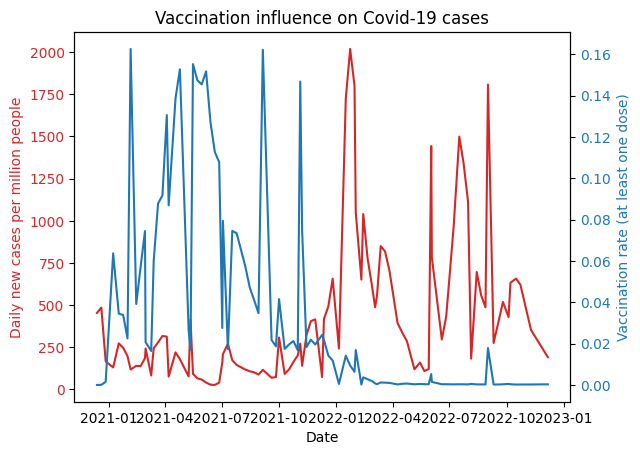

In [32]:
cols = ['dateRep', 'cases', 'deaths','FirstDose', 'SecondDose', 'Population']
c = merged_datasetfu[cols]

# Convert dateRep column to datetime
c['dateRep'] = pd.to_datetime(c['dateRep'])

# Group the data by country and date
c['dateRep'] = pd.to_datetime(c['dateRep'])
grouped = c.groupby('dateRep').sum()

# Calculate the total number of vaccine doses administered per day
grouped['TotalDoses'] = grouped['FirstDose'] + grouped['SecondDose']

# Calculate the percentage of the population that has received at least one dose of the vaccine
grouped['AtLeastOneDose'] = grouped['FirstDose'] / grouped['Population'] * 100

# Calculate the daily new cases per million people
grouped['NewCasesPerMillion'] = grouped['cases'] / grouped['Population'] * 1000000

# Create line chart
fig, ax1 = plt.subplots()

# Plot daily new cases on the first axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily new cases per million people', color=color)
ax1.plot(grouped.index, grouped['NewCasesPerMillion'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Add a second axis for vaccination rate
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Vaccination rate (at least one dose)', color=color)
ax2.plot(grouped.index, grouped['AtLeastOneDose'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Vaccination influence on Covid-19 cases')
plt.show()

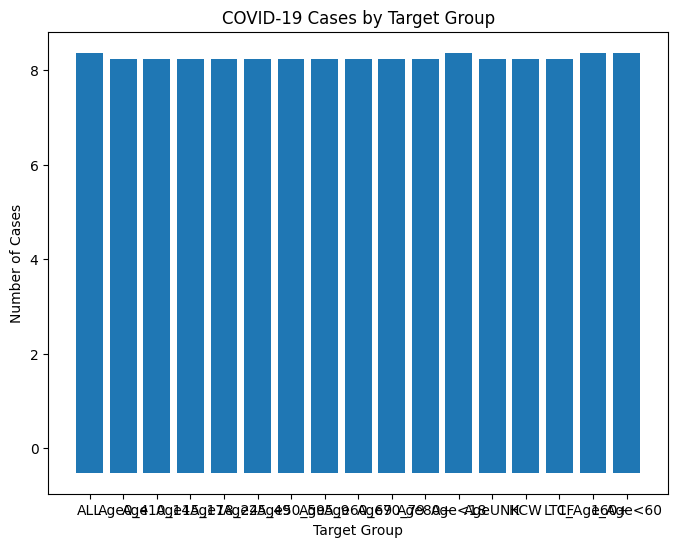

In [18]:
plt.figure(figsize=(8, 6))
plt.bar(finald['TargetGroup'], finald['deaths'])
plt.xlabel('Target Group')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases by Target Group')
plt.show()


In [19]:
merged_datasetfu.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2020', 'continentExp', 'Entity_x',
       'international_travel_controls', 'dateRep2', 'Country', 'GDP',
       'Entity_y', 'school_closures', 'ReportingCountry', 'FirstDose',
       'SecondDose', 'DoseAdditional1', 'DoseAdditional2', 'DoseAdditional3',
       'UnknownDose', 'Region', 'TargetGroup', 'Vaccine', 'Population'],
      dtype='object')

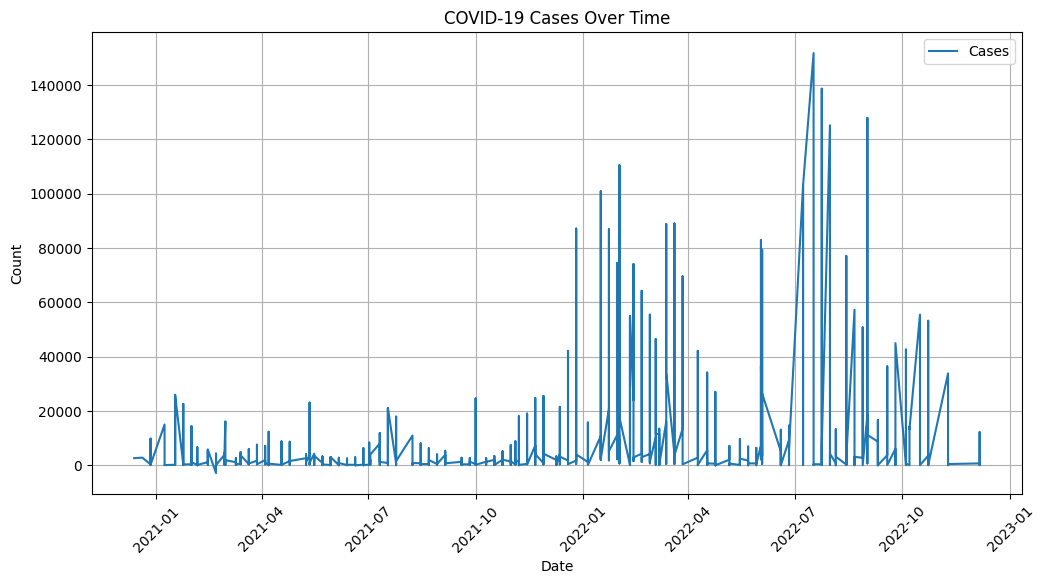

In [22]:
import matplotlib.pyplot as plt

# Convert the 'dateRep' column to datetime format
merged_datasetfu['dateRep'] = pd.to_datetime(merged_datasetfu['dateRep'])

# Sort the dataset by date in ascending order
merged_datasetfu = merged_datasetfu.sort_values('dateRep')

# Create a line plot for COVID-19 cases and deaths over time
plt.figure(figsize=(12, 6))
plt.plot(merged_datasetfu['dateRep'], merged_datasetfu['cases'], label='Cases')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Cases Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [53]:
finald.isnull().sum()

dateRep                          0
cases                            0
deaths                           0
geoId                            0
international_travel_controls    0
GDP                              0
school_closures                  0
FirstDose                        0
SecondDose                       0
DoseAdditional1                  0
DoseAdditional2                  0
DoseAdditional3                  0
UnknownDose                      0
TargetGroup                      0
Vaccine                          0
Population                       0
dtype: int64

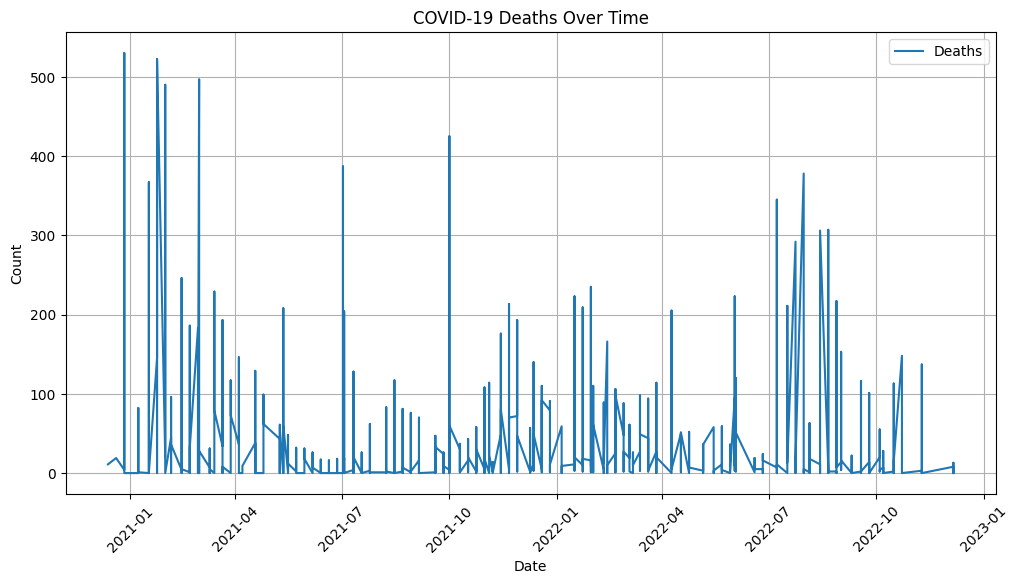

In [25]:
import matplotlib.pyplot as plt

# Convert the 'dateRep' column to datetime format
merged_datasetfu['dateRep'] = pd.to_datetime(merged_datasetfu['dateRep'])

# Sort the dataset by date in ascending order
merged_datasetfu = merged_datasetfu.sort_values('dateRep')

# Create a line plot for COVID-19 cases and deaths over time
plt.figure(figsize=(12, 6))
plt.plot(merged_datasetfu['dateRep'], merged_datasetfu['deaths'], label='Deaths')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Deaths Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [46]:
 merged_datasetfu.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,...,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,Region,TargetGroup,Vaccine,Population
0,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,...,5,1,15,922,22,0,AT,ALL,MODBA.1,8978929
1,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,...,12,24,85,1579,39,0,AT,ALL,COMBA.1,8978929
2,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,...,0,2,6,18,0,0,AT,ALL,NVXD,8978929
3,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,...,18,34,15,44,3,0,AT,ALL,VLA,8978929
4,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,...,242,155,1906,51569,1315,0,AT,ALL,COMBA.4-5,8978929


In [29]:
df['countriesAndTerritories'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden'], dtype=object)

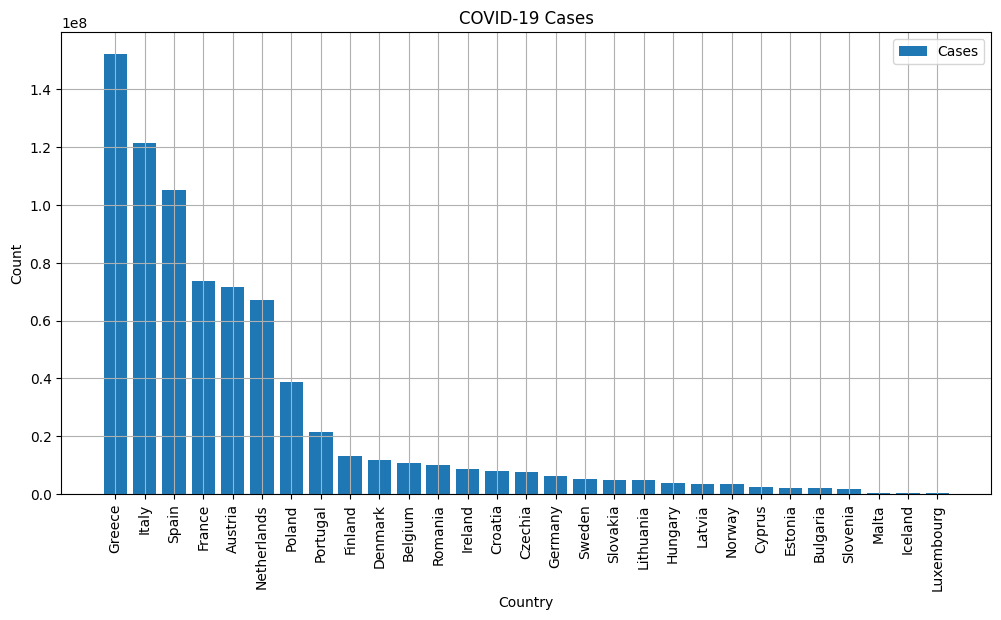

In [48]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called "merged_datasetfu" with columns "countriesAndTerritories", "cases", and "deaths"
# Example data
countries = merged_datasetfu['countriesAndTerritories'].unique()

# Calculate the total cases and deaths for each country
total_cases = merged_datasetfu.groupby('countriesAndTerritories')['cases'].sum()


# Sort the countries based on the total number of cases
sorted_countries = total_cases.sort_values(ascending=False).index

# Plot the total cases and deaths by country
plt.figure(figsize=(12, 6))
plt.bar(sorted_countries, total_cases.loc[sorted_countries], label='Cases')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('COVID-19 Cases')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


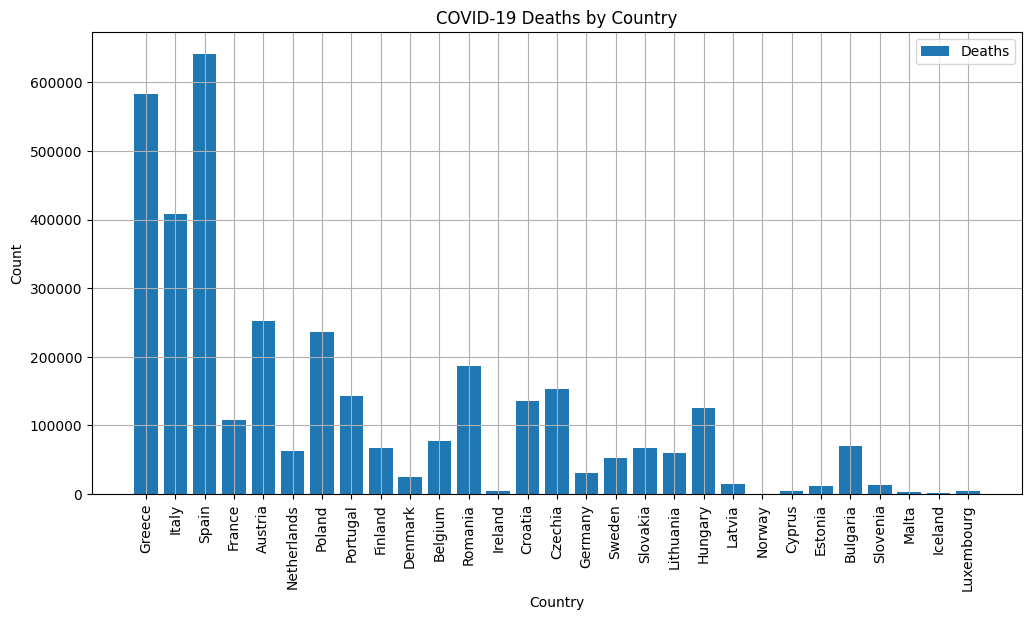

In [49]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called "merged_datasetfu" with columns "countriesAndTerritories", "cases", and "deaths"
# Example data
countries = merged_datasetfu['countriesAndTerritories'].unique()

# Calculate the total cases and deaths for each country

total_deaths = merged_datasetfu.groupby('countriesAndTerritories')['deaths'].sum()

# Sort the countries based on the total number of cases
sorted_countries = total_cases.sort_values(ascending=False).index

# Plot the total cases and deaths by country
plt.figure(figsize=(12, 6))

plt.bar(sorted_countries, total_deaths.loc[sorted_countries], label='Deaths')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('COVID-19 Deaths by Country')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [50]:
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

data = finald.drop(['dateRep'], axis=1)

# identify categorical and numerical columns
cat_cols = ['geoId', 'TargetGroup', 'Vaccine']
num_cols = list(set(data.columns) - set(cat_cols))

# candidate values for our number of cluster parameters


In [110]:
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

data = finald.drop(['dateRep'], axis=1)

# identify categorical and numerical columns
cat_cols = ['geoId', 'TargetGroup', 'Vaccine']
num_cols = list(set(data.columns) - set(cat_cols))

# candidate values for our number of cluster parameters
parameters = [2, 3, 4 , 5, 6, 7, 8, 10, 12]

# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})

best_score = -1
kproto_model = KPrototypes()
silhouette_scores = []

# evaluation based on silhouette_score
for p in parameter_grid:
    kproto_model.set_params(**p) # set current hyper parameter
    kproto_model.fit(data, categorical=[data.columns.get_loc(col) for col in cat_cols]) # fit model on dataset, this will find clusters based on parameter p
    num_data = data[num_cols].to_numpy() # create array of just the numerical columns
    ss = metrics.silhouette_score(num_data, kproto_model.labels_) # calculate silhouette_score
    silhouette_scores += [ss] # store all the scores
    print('Parameter:', p, 'Score', ss)

    # check if p has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p

# plotting silhouette score
plt.bar(np.arange(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
plt.xticks(np.arange(len(silhouette_scores)), parameters)
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()


Parameter: {'n_clusters': 2} Score 0.9895537576154565


KeyboardInterrupt: ignored

In [51]:
# instantiate KPrototypes model with the best number of clusters
kproto_model = KPrototypes(n_clusters=6)

# fit model to data
kproto_model.fit(data, categorical=[data.columns.get_loc(col) for col in cat_cols])

# predict cluster labels for data
cluster_labels = kproto_model.fit_predict(data, categorical=[data.columns.get_loc(col) for col in cat_cols])

In [52]:
data['cluster'] = cluster_labels

# Group the data by cluster and country and count the number of countries in each cluster
grouped = data.groupby(['cluster', 'geoId']).size().reset_index(name='count')

In [26]:
grouped

,cluster,geoId,count
0,0,AT,161
1,1,AT,30
2,2,AT,5501
3,2,BE,2287
4,2,BG,1672
5,2,CY,1990
6,2,CZ,2435
7,2,DK,1600
8,2,EE,3858
9,2,EL,2380


In [24]:
data.tail(20)

,cases,deaths,geoId,international_travel_controls,GDP,school_closures,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,TargetGroup,Vaccine,Population,cluster
64170,0.631453,2.554274,ES,3,-0.551461,3,-0.075448,-0.071621,-0.049305,-0.053136,-0.024263,0,Age<18,MOD,2.529536,10
64171,0.631453,2.554274,ES,3,-0.551461,3,-0.075448,-0.071621,-0.049305,-0.053136,-0.024263,0,Age<18,COMBIV,2.529536,10
64172,0.631453,2.554274,ES,3,-0.551461,3,-0.075448,-0.071621,-0.049305,-0.053136,-0.024263,0,AgeUNK,MOD,2.529536,10
64173,0.631453,2.554274,ES,3,-0.551461,3,-0.075448,-0.071621,-0.049305,-0.053136,-0.024263,0,AgeUNK,JANSS,2.529536,10
64174,0.631453,2.554274,ES,3,-0.551461,3,-0.075448,-0.071621,-0.049305,-0.053136,-0.024263,0,AgeUNK,MODBIV,2.529536,10
64175,0.631453,2.554274,ES,3,-0.551461,3,-0.075448,-0.071621,-0.049305,-0.053136,-0.024263,0,AgeUNK,COMBIV,2.529536,10
64176,0.631453,2.554274,ES,3,-0.551461,3,-0.075448,-0.071621,-0.049305,-0.053136,-0.024263,0,AgeUNK,COM,2.529536,10
64177,0.631453,2.554274,ES,3,-0.551461,3,-0.075448,-0.071621,-0.049305,-0.053136,-0.024263,0,AgeUNK,AZ,2.529536,10
64178,0.631453,2.554274,ES,3,-0.551461,3,-0.075448,-0.071621,-0.049305,-0.053136,-0.024263,0,HCW,JANSS,2.529536,10
64179,0.631453,2.554274,ES,3,-0.551461,3,-0.075448,-0.071621,-0.049305,-0.053136,-0.024263,0,HCW,MODBIV,2.529536,10


In [25]:
print(cluster_labels)

[ 2  2  2 ... 10 10 10]


In [28]:
cluster_means = data.groupby('cluster').mean()

# Print the cluster means for all variables
print(cluster_means)

            cases    deaths  international_travel_controls       GDP  \
cluster                                                                
0       -0.086140 -0.161338                       2.527950  0.914865   
1       -0.282309 -0.134485                       2.966667  0.932501   
2       -0.137724 -0.302638                       0.664440  0.154026   
3        1.362852  0.173905                       0.935484  0.631047   
4       -0.218226 -0.103064                       2.904762  0.929926   
5       -0.314821 -0.249151                       3.000000  0.932501   
6        0.037259  0.414844                       2.784946  0.475459   
7       -0.283499 -0.050746                       3.000000  0.932501   
8       -0.256940 -0.153502                       3.007236  0.029416   
9       -0.333121 -0.438619                       0.000000  0.757920   
10       0.109109  0.567404                       2.081669 -0.516717   
11       3.859112  3.564538                       0.680572 -0.91

<ipython-input-28-13958833ac55>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data.groupby('cluster').mean()


In [37]:
code_map = {'AT': 'AUT', 'BE': 'BEL', 'BG': 'BGR', 'HR': 'HRV', 'CY': 'CYP',
            'CZ': 'CZE', 'DK': 'DNK', 'EE': 'EST', 'FI': 'FIN', 'FR': 'FRA',
            'DE': 'DEU', 'EL': 'GRC', 'HU': 'HUN', 'IS': 'ISL', 'IE': 'IRL',
            'IT': 'ITA', 'LV': 'LVA', 'LI': 'LIE', 'LT': 'LTU', 'LU': 'LUX',
            'MT': 'MLT', 'NL': 'NLD', 'NO': 'NOR', 'PL': 'POL', 'PT': 'PRT',
            'RO': 'ROU', 'SK': 'SVK', 'SI': 'SVN', 'ES': 'ESP', 'SE': 'SWE'}
data['geoId'] = data['geoId'].map(code_map)

<ipython-input-30-9c91000973f3>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


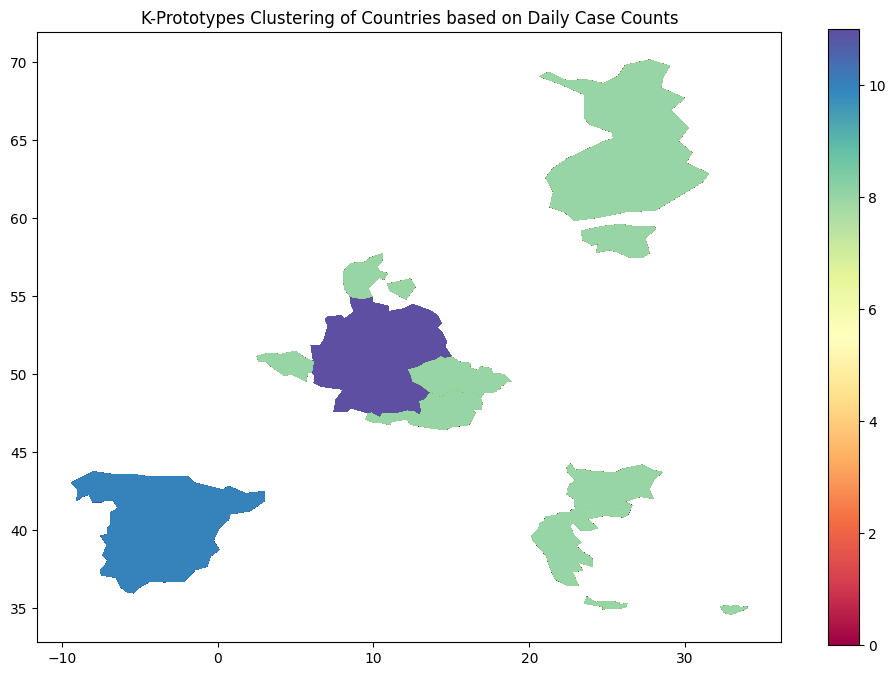

In [30]:
# Load a dataset of country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the country boundaries with the clustered data
merged = world.merge(data, left_on='iso_a3', right_on='geoId')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))

merged.plot(column='cluster', cmap='Spectral',  aspect=1, legend=True, ax=ax)
ax.set_title('K-Prototypes Clustering of Countries based on Daily Case Counts')
plt.show()

In [35]:
beta = 2.5
n_clusters=12
centroids = kproto_model.cluster_centroids_
for i in range(len(centroids)):
    cluster_points = data[data['cluster'] == i]
    
# Calculate the within-cluster sum of squares (epsilon) for each cluster
epsilons = []
for i in range(n_clusters):
    if kproto_model.cost_ == 0:
        break
    total_cost = kproto_model.cost_
    print("Iteration:", i, "Total Cost:", total_cost)

    epsilon = total_cost / len(cluster_points)
    epsilons.append(epsilon)

# Determine whether each cluster is sparse or not
median_epsilon = np.median(epsilons)
sparse_clusters = []
for i, epsilon in enumerate(epsilons):
    if epsilon > beta * median_epsilon:
        sparse_clusters.append(i)

Iteration: 0 Total Cost: 539093.1924065484
Iteration: 1 Total Cost: 539093.1924065484
Iteration: 2 Total Cost: 539093.1924065484
Iteration: 3 Total Cost: 539093.1924065484
Iteration: 4 Total Cost: 539093.1924065484
Iteration: 5 Total Cost: 539093.1924065484
Iteration: 6 Total Cost: 539093.1924065484
Iteration: 7 Total Cost: 539093.1924065484
Iteration: 8 Total Cost: 539093.1924065484
Iteration: 9 Total Cost: 539093.1924065484
Iteration: 10 Total Cost: 539093.1924065484
Iteration: 11 Total Cost: 539093.1924065484


In [53]:
beta = 2.5
n_clusters=6
centroids = kproto_model.cluster_centroids_
for i in range(len(centroids)):
    cluster_points = data[data['cluster'] == i]
    
# Calculate the within-cluster sum of squares (epsilon) for each cluster
epsilons = []
for i in range(n_clusters):
    if kproto_model.cost_ == 0:
        break
    total_cost = kproto_model.cost_
    print("Iteration:", i, "Total Cost:", total_cost)

    epsilon = total_cost / len(cluster_points)
    epsilons.append(epsilon)

# Determine whether each cluster is sparse or not
median_epsilon = np.median(epsilons)
sparse_clusters = []
for i, epsilon in enumerate(epsilons):
    if epsilon > beta * median_epsilon:
        sparse_clusters.append(i)

Iteration: 0 Total Cost: 2855343459731.7466
Iteration: 1 Total Cost: 2855343459731.7466
Iteration: 2 Total Cost: 2855343459731.7466
Iteration: 3 Total Cost: 2855343459731.7466
Iteration: 4 Total Cost: 2855343459731.7466
Iteration: 5 Total Cost: 2855343459731.7466


In [49]:
beta = 0.1
n_clusters = 12
centroids = kproto_model.cluster_centroids_

# Calculate the within-cluster sum of squares (epsilon) for each cluster
epsilons = []
for i in range(n_clusters):
    cluster_points = data[data['cluster'] == i]
    if len(cluster_points) == 0:
        print("Cluster", i, "has no points assigned to it")
    else:
        total_cost = kproto_model.cost_
        epsilon = total_cost / len(cluster_points)
        if epsilon > beta * median_epsilon:
            print("Cluster", i, "is sparse")
        elif epsilon < beta * median_epsilon / 2:
            print("Cluster", i, "is dense")
        else:
            print("Cluster", i, "is normal")

Cluster 0 is sparse
Cluster 1 is sparse
Cluster 2 is normal
Cluster 3 is sparse
Cluster 4 is sparse
Cluster 5 is sparse
Cluster 6 is sparse
Cluster 7 is sparse
Cluster 8 is normal
Cluster 9 is sparse
Cluster 10 is sparse
Cluster 11 is sparse


In [57]:
beta = 1.5
n_clusters = 6
centroids = kproto_model.cluster_centroids_

# Calculate the within-cluster sum of squares (epsilon) for each cluster
epsilons = []
for i in range(n_clusters):
    cluster_points = data[data['cluster'] == i]
    if len(cluster_points) == 0:
        print("Cluster", i, "has no points assigned to it")
    else:
        total_cost = kproto_model.cost_
        epsilon = total_cost / len(cluster_points)
        if epsilon > beta * median_epsilon:
            print("Cluster", i, "is sparse")
        elif epsilon < beta * median_epsilon / 2:
            print("Cluster", i, "is dense")
        else:
            print("Cluster", i, "is normal")

Cluster 0 is sparse
Cluster 1 is sparse
Cluster 2 is sparse
Cluster 3 is sparse
Cluster 4 is sparse
Cluster 5 is normal


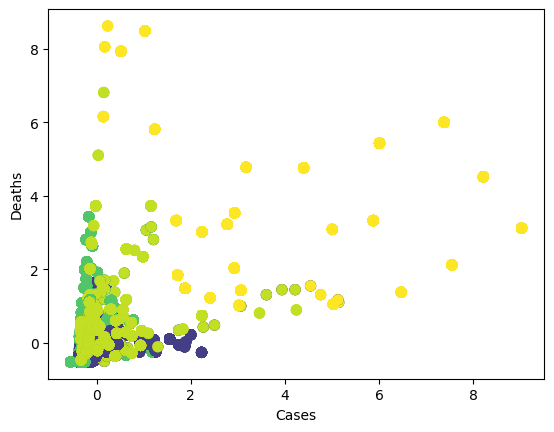

In [50]:
from matplotlib import pyplot as plt
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()

In [58]:
# Create a new column to store the risk labels
data['risk_label'] = ''

# Assign risk labels based on cluster values
for i in range(len(data)):
    if cluster_labels[i] in [5]:
        data.loc[i, 'risk_label'] = 'Low risk'
    else:
        data.loc[i, 'risk_label'] = 'High risk'


In [22]:
# Create a new column to store the risk labels
data['risk_label'] = ''

# Assign risk labels based on cluster values
for i in range(len(data)):
    if cluster_labels[i] in [0]:
        data.loc[i, 'risk_label'] = 'Low risk'
    else:
        data.loc[i, 'risk_label'] = 'High risk'


In [55]:
data.head()

,cases,deaths,geoId,international_travel_controls,GDP,school_closures,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,TargetGroup,Vaccine,Population,cluster,risk_label
0,-0.150601,-0.51498,AUT,0,0.851377,2,-0.075369,-0.071605,-0.049094,0.034065,0.003864,0,ALL,MODBA.1,-0.254522,2,Low risk
1,-0.150601,-0.51498,AUT,0,0.851377,2,-0.075258,-0.071234,-0.048108,0.096204,0.025598,0,ALL,COMBA.1,-0.254522,2,Low risk
2,-0.150601,-0.51498,AUT,0,0.851377,2,-0.075448,-0.071589,-0.049221,-0.051434,-0.024263,0,ALL,NVXD,-0.254522,2,Low risk
3,-0.150601,-0.51498,AUT,0,0.851377,2,-0.075163,-0.071073,-0.049094,-0.048975,-0.020428,0,ALL,VLA,-0.254522,2,Low risk
4,-0.150601,-0.51498,AUT,0,0.851377,2,-0.071624,-0.069120,-0.022451,4.824194,1.656939,0,ALL,COMBA.4-5,-0.254522,2,Low risk


In [23]:
data['risk_label'] = data['risk_label'].map({'Low risk': 0, 'High risk': 1})

# Print the updated dataset
print(data)

          cases    deaths geoId  international_travel_controls       GDP  \
0     -0.180783 -0.540649    AT                              0  0.967753   
1     -0.180783 -0.540649    AT                              0  0.967753   
2     -0.180783 -0.540649    AT                              0  0.967753   
3     -0.180783 -0.540649    AT                              0  0.967753   
4     -0.180783 -0.540649    AT                              0  0.967753   
...         ...       ...   ...                            ...       ...   
55790  0.553194  2.355432    ES                              3 -0.418533   
55791  0.553194  2.355432    ES                              3 -0.418533   
55792  0.553194  2.355432    ES                              3 -0.418533   
55793  0.553194  2.355432    ES                              3 -0.418533   
55794  0.553194  2.355432    ES                              3 -0.418533   

       school_closures  FirstDose  SecondDose  DoseAdditional1  \
0                    

In [59]:
data['risk_label'] = data['risk_label'].map({'Low risk': 0, 'High risk': 1})

# Print the updated dataset
print(data)

         cases    deaths geoId  international_travel_controls       GDP  \
0       3557.0 -0.479875    AT                              0  0.390383   
1       3557.0 -0.479875    AT                              0  0.390383   
2       3557.0 -0.479875    AT                              0  0.390383   
3       3557.0 -0.479875    AT                              0  0.390383   
4       3557.0 -0.479875    AT                              0  0.390383   
...        ...       ...   ...                            ...       ...   
140385  3208.0  1.402373    SE                              3  0.413935   
140386  3208.0  1.402373    SE                              3  0.413935   
140387  3208.0  1.402373    SE                              3  0.413935   
140388  3208.0  1.402373    SE                              3  0.413935   
140389  3208.0  1.402373    SE                              3  0.413935   

        school_closures  FirstDose  SecondDose  DoseAdditional1  \
0                     2  -0.0894

In [44]:
data.iloc[:, -1].values

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
data.iloc[:, :-1].values


array([[-0.11779939127579148, -0.47987539940680396, 'AUT', ...,
        'MODBA.1', -0.2536451239922957, 1],
       [-0.11779939127579148, -0.47987539940680396, 'AUT', ...,
        'COMBA.1', -0.2536451239922957, 1],
       [-0.11779939127579148, -0.47987539940680396, 'AUT', ..., 'NVXD',
        -0.2536451239922957, 1],
       ...,
       [-0.13971303244681452, 1.4023726485822168, 'SWE', ..., 'COM',
        -0.16801403345116261, 1],
       [-0.13971303244681452, 1.4023726485822168, 'SWE', ..., 'AZ',
        -0.16801403345116261, 1],
       [-0.13971303244681452, 1.4023726485822168, 'SWE', ..., 'UNK',
        -0.16801403345116261, 1]], dtype=object)

In [67]:
data.dtypes

cases                            float64
deaths                           float64
geoId                             object
international_travel_controls      int64
GDP                              float64
school_closures                    int64
FirstDose                        float64
SecondDose                       float64
DoseAdditional1                  float64
DoseAdditional2                  float64
DoseAdditional3                  float64
UnknownDose                        int64
TargetGroup                       object
Vaccine                           object
Population                       float64
cluster                           uint16
risk_label                         int64
dtype: object

In [60]:
data = data.drop(['geoId', 'TargetGroup', 'Vaccine'], axis=1)


In [61]:
X = data.iloc[:, [0,1]].values
y = data.iloc[:, -1].values

In [92]:
 data.iloc[:, [0,1]].values

array([[-0.15060099, -0.51498042],
       [-0.15060099, -0.51498042],
       [-0.15060099, -0.51498042],
       ...,
       [ 0.63145328,  2.5542739 ],
       [ 0.63145328,  2.5542739 ],
       [ 0.63145328,  2.5542739 ]])

In [62]:
from sklearn.model_selection import train_test_split
# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0)

In [63]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler
# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [64]:
# importing SVM module
from sklearn.svm import SVC
# kernel to be set linear as it is binary class
classifier = SVC(kernel='linear', C=0.0001)
# traininf the model
classifier.fit(X_train, y_train)

SVC(C=0.0001, kernel='linear')

In [65]:
# testing the model
y_pred = classifier.predict(X_test)

In [89]:
# importing accuracy score
from sklearn.metrics import accuracy_score
# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.901296111665005


In [66]:
# importing accuracy score
from sklearn.metrics import accuracy_score
# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.8373126673884552


<ipython-input-93-47985f4dac3c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


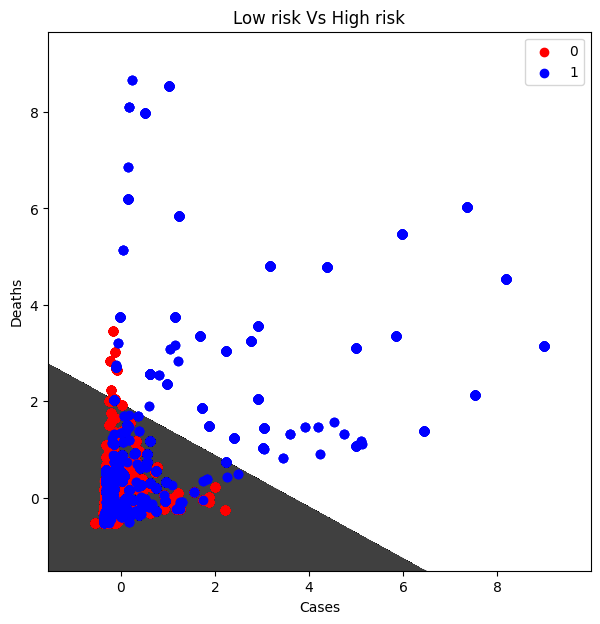

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# plotting the figure
plt.figure(figsize=(7, 7))

# Assigning the input values
X_set, y_set = X_train[:, :2], y_train

# Plotting the decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('black', 'white')))

# Plot scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'blue'))(i), label=j)

# Labeling the graph
plt.title('Low risk Vs High risk')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend()
plt.show()


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# plotting the figure
plt.figure(figsize=(7, 7))

# Assigning the input values
X_set, y_set = X_train[:, :2], y_train

# Plotting the decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('black', 'white')))

# Plot scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'blue'))(i), label=j)

# Labeling the graph
plt.title('Low risk Vs High risk')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend()
plt.show()


KeyboardInterrupt: ignored

<Figure size 700x700 with 0 Axes>

<ipython-input-94-cefb81d93427>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'blue'))(i), label = j)


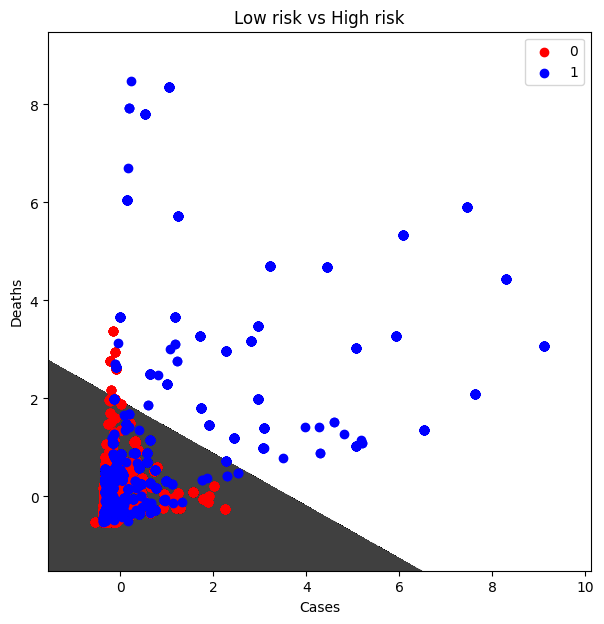

In [94]:
plt.figure(figsize = (7,7))
# assigning the testing dataset
X_set, y_set = X_test, y_test
# ploting the predicted graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# plorting scattred graph for the testing values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'blue'))(i), label = j)
# labelling the graphe
plt.title('Low risk vs High risk')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [83]:
data.iloc[:, [0,1]].values

array([[-0.15060099, -0.51498042],
       [-0.15060099, -0.51498042],
       [-0.15060099, -0.51498042],
       ...,
       [ 0.63145328,  2.5542739 ],
       [ 0.63145328,  2.5542739 ],
       [ 0.63145328,  2.5542739 ]])

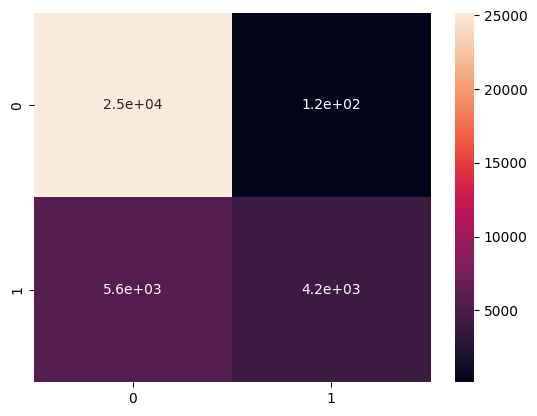

In [68]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
# true Write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [69]:
# importing classification report
from sklearn.metrics import classification_report
# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     25303
           1       0.97      0.43      0.60      9795

    accuracy                           0.84     35098
   macro avg       0.90      0.71      0.75     35098
weighted avg       0.86      0.84      0.81     35098



In [70]:
# Count the occurrences of class 1 and class 0 in the predicted values
class_1_count = sum(y_pred == 1)
class_0_count = sum(y_pred == 0)

# Print the counts
print("Predicted Class 1 count:", class_1_count)
print("Predicted Class 0 count:", class_0_count)


Predicted Class 1 count: 4327
Predicted Class 0 count: 30771
